### Task 1

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df2 = pd.read_excel(r'C:\Users\HP\Desktop\CV, P.Statement and others\Dataset\Week2_challenge_data_source.xlsx')

In [100]:
df2.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
df2.shape

(150001, 55)

In [70]:
#df2.info()

In [71]:
#df2.dtypes

In [ ]:
df2["Handset Manufacturer"].value_counts()

Apple                                            59565
Samsung                                          40839
Huawei                                           34423
undefined                                         8987
Sony Mobile Communications Ab                      980
                                                 ...  
Shenzhen Sprocomm Technologies Co Ltd                1
Adar                                                 1
Shenzhen City Ramos Digital Technology Co Ltd        1
Shenzhen New Chabridge Communication Co Ltd          1
Shenzhen Jsr Technology Co Ltd                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [ ]:
df2["Handset Type"].value_counts()

Huawei B528S-23A                           19752
Apple iPhone 6S (A1688)                     9419
Apple iPhone 6 (A1586)                      9023
undefined                                   8987
Apple iPhone 7 (A1778)                      6326
                                           ...  
Gemalto M2M Gmbh Cinterion Ehs5-E              1
Tct Mobile Suzho. Alcatel One Touch 997        1
Shenzhen Sprocom. Fly Iq4490                   1
Sony Mobile Comm. Sony C5303 -Xperia Sp        1
Htc 2Q6E100                                    1
Name: Handset Type, Length: 1396, dtype: int64

In [101]:
df2['MSISDN/Number'].isnull().sum()

1066

In [102]:
df2.dropna(subset=['MSISDN/Number'], inplace=True)

In [103]:
df2['MSISDN/Number'].shape

(148935,)

In [104]:
#Task 1.1
#Number of xDR session
Number_of_xDR_session = df2.groupby(["MSISDN/Number"]).agg({'Bearer Id':'count'})
print(Number_of_xDR_session.sort_values('Bearer Id', ascending=False).head(10))


               Bearer Id
MSISDN/Number           
3.362632e+10          18
3.362578e+10          17
3.361489e+10          17
3.365973e+10          16
3.376054e+10          15
3.367588e+10          15
3.366716e+10          13
3.362708e+10          12
3.360452e+10          12
3.376041e+10          12


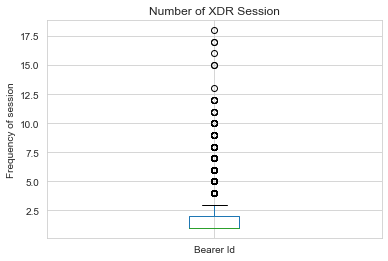

In [263]:
Number_of_xDR_session.boxplot()
plt.ylabel('Frequency of session')
plt.title('Number of XDR Session')
plt.show()

In [105]:
df2["Dur. (ms).1"].isnull().sum()

0

0
                Dur. (ms).1
MSISDN/Number              
3.362578e+10   1.855376e+10
3.361489e+10   9.966906e+09
3.376054e+10   9.279442e+09
3.362632e+10   8.791937e+09
3.366716e+10   8.744922e+09
3.366284e+10   6.614274e+09
3.366469e+10   6.288736e+09
3.360313e+10   6.287767e+09
3.366746e+10   5.649885e+09
3.376041e+10   5.321674e+09


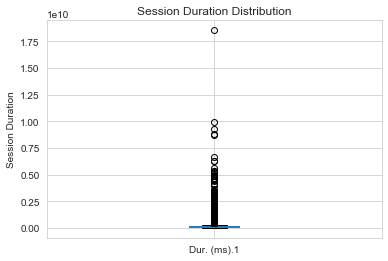

In [267]:
#session duration
print(df2['Dur. (ms).1'].isnull().sum())
session_duration = df2.groupby(["MSISDN/Number"]).agg({'Dur. (ms).1':'sum'})
print(session_duration.sort_values('Dur. (ms).1', ascending=False).head(10))

#univariante graphical plot
session_duration.boxplot()
plt.ylabel('Session Duration')
plt.title('Session Duration Distribution')
plt.show()

In [107]:
df2['total DL_UL data'] = df2['Total UL (Bytes)']+df2["Total DL (Bytes)"]
df2["total_social"]=df2["Social Media DL (Bytes)"]+df2["Social Media UL (Bytes)"]
df2["total_netflix"]=df2['Netflix DL (Bytes)']+df2['Netflix UL (Bytes)']
df2["total_email"]=df2['Email DL (Bytes)']+df2['Email UL (Bytes)']
df2['total_gaming']=df2['Gaming DL (Bytes)']+df2['Gaming UL (Bytes)']
df2['total_google']=df2['Google DL (Bytes)']+df2['Google UL (Bytes)']
df2['total_youtube']=df2['Youtube DL (Bytes)']+df2['Youtube UL (Bytes)']
df2['total DL_UL data'].shape

(148935,)

In [108]:
d_f=df2.pivot_table(index="MSISDN/Number", values=['total_gaming','total_google','total_youtube','total_social','total_email','total_netflix','total DL_UL data'], aggfunc='sum')
print(d_f.head())
d_f.shape

               total DL_UL data  total_email  total_gaming  total_google  \
MSISDN/Number                                                              
3.360100e+10       8.786906e+08    1331362.0  8.124587e+08     4389005.0   
3.360100e+10       1.568596e+08    3307781.0  1.197501e+08     5334863.0   
3.360100e+10       5.959665e+08    3205380.0  5.388277e+08     3443126.0   
3.360101e+10       4.223207e+08    2284670.0  3.911261e+08     9678493.0   
3.360101e+10       1.457411e+09    3305469.0  1.314798e+09    18499616.0   

               total_netflix  total_social  total_youtube  
MSISDN/Number                                              
3.360100e+10      27180981.0     2232135.0     21624548.0  
3.360100e+10      11221763.0     2660565.0     12432223.0  
3.360100e+10      19353900.0     3195623.0     21333570.0  
3.360101e+10       1942092.0      280294.0      6977321.0  
3.360101e+10      49201724.0     2912542.0     41533002.0  


(106856, 7)

In [109]:
df_e=df2.pivot_table(index="MSISDN/Number", values=['total DL_UL data'], aggfunc='sum')
df_e.head()

,total DL_UL data
MSISDN/Number,
3.360100e+10,8.786906e+08
3.360100e+10,1.568596e+08
3.360100e+10,5.959665e+08
3.360101e+10,4.223207e+08
3.360101e+10,1.457411e+09


In [110]:

df_new = pd.concat([d_f,Number_of_xDR_session,session_duration], axis=1)
print(df_new.head(2))

               total DL_UL data  total_email  total_gaming  total_google  \
MSISDN/Number                                                              
3.360100e+10        878690574.0    1331362.0   812458661.0     4389005.0   

               total_netflix  total_social  total_youtube  Bearer Id  \
MSISDN/Number                                                          
3.360100e+10      27180981.0     2232135.0     21624548.0          1   

               Dur. (ms).1  
MSISDN/Number               
3.360100e+10   116720140.0  


In [112]:
df_new.describe()

,total DL_UL data,total_email,total_gaming,total_google,total_netflix,total_social,total_youtube,Bearer Id,Dur. (ms).1
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05
mean,6.909621e+08,3.148796e+06,5.997690e+08,1.088243e+07,3.153833e+07,2.547967e+06,3.155840e+07,1.393792,1.461679e+08
std,4.910559e+08,2.222400e+06,4.491505e+08,7.544861e+06,2.128956e+07,1.908038e+06,2.129492e+07,0.806022,1.863590e+08
min,3.324901e+07,1.817600e+04,3.063580e+05,4.033000e+04,1.845690e+05,1.563000e+03,7.890300e+04,1.000000,7.142988e+06
25%,3.585499e+08,1.674481e+06,2.880631e+08,5.942636e+06,1.855597e+07,1.211282e+06,1.863109e+07,1.000000,7.130834e+07
50%,6.179231e+08,2.799824e+06,5.423492e+08,9.586153e+06,2.671889e+07,2.303756e+06,2.680038e+07,1.000000,1.027402e+08
75%,8.574351e+08,3.847198e+06,7.773041e+08,1.321474e+07,3.797696e+07,3.307509e+06,3.792798e+07,2.000000,1.728000e+08
max,8.846226e+09,4.241878e+07,7.749432e+09,1.521919e+08,3.995191e+08,4.337478e+07,4.529588e+08,18.000000,1.855376e+10


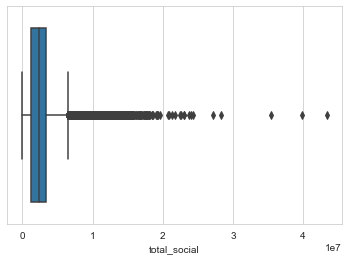

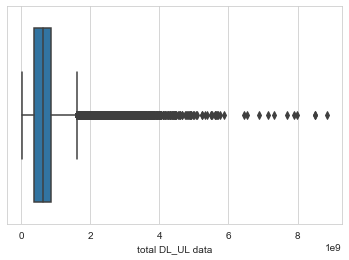

In [265]:
#graphical Univariante Analysis
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="total_social", data=df_new)
plt.show()

ax = sns.boxplot(x="total DL_UL data", data=df_new)
plt.show()


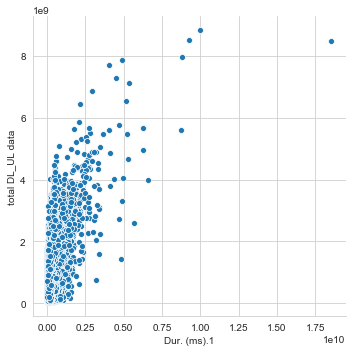

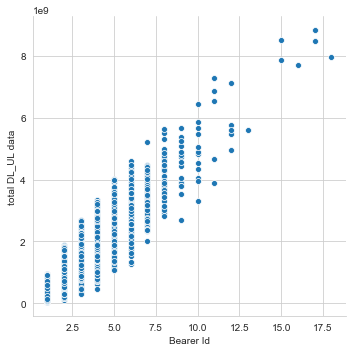

In [266]:
import seaborn as sns
sns.relplot(x='Dur. (ms).1',y='total DL_UL data', data=df_new, kind="scatter")
sns.relplot(x='Bearer Id',y='total DL_UL data', data=df_new, kind="scatter")

plt.show()

In [126]:
d_f[['total_gaming']].sort_values('total_gaming', ascending=False).head(10)
d_f[['total_social']].sort_values('total_social', ascending=False).head(10)
d_f[['total_google']].sort_values('total_google', ascending=False).head(10)
d_f[['total_youtube']].sort_values('total_youtube', ascending=False).head(10)
d_f[['total_email']].sort_values('total_email',ascending=False).head(10)
d_f[['total_netflix']].sort_values('total_netflix', ascending=False).head(10)
d_f[['total DL_UL data']].sort_values('total DL_UL data', ascending=False).head(10)

,total DL_UL data
MSISDN/Number,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


In [205]:
df_engage = pd.concat([Number_of_xDR_session,session_duration,df_e], axis=1)
df_engage.head()

,Bearer Id,Dur. (ms).1,total DL_UL data
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


In [206]:
import pandas as pd
from sklearn import preprocessing
#normalized_df = preprocessing.normalize(df_e)
#print(normalized_df)
normalized_df=(df_engage-df_engage.mean())/df_engage.std()
normalized_df.head()

,Bearer Id,Dur. (ms).1,total DL_UL data
MSISDN/Number,,,
3.360100e+10,-0.488562,-0.158016,0.382296
3.360100e+10,-0.488562,0.188148,-1.087661
3.360100e+10,-0.488562,-0.060091,-0.193452
3.360101e+10,-0.488562,-0.516690,-0.547069
3.360101e+10,0.752099,-0.585233,1.560818


[[ 0.97893827  0.37089885  0.86609129]
 [-0.45374392 -0.23096217 -0.3991637 ]
 [ 3.74298436  2.74823042  3.26026791]]


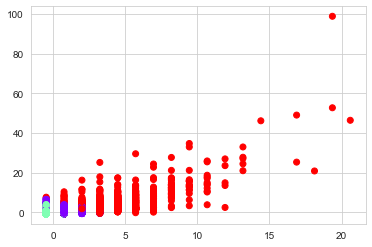

In [207]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3, random_state=0) 
#kmeans.fit(normalized_duration.reshape(-1,1))


from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Kmeans = KMeans(n_clusters=3).fit(normalized_df)
centroids_eng = Kmeans.cluster_centers_
print(centroids_eng)
plt.scatter(normalized_df.iloc[:,0],normalized_df.iloc[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.show()


In [245]:
df_engage['cluster'] = Kmeans.labels_
df_engage.head()

#Computing the minimum, maximum, average & total non- normalized metrics for each cluster
Agg_Bearer=df_engage.groupby(['cluster']).agg({'Bearer Id': ['sum', 'max', 'min', 'mean']})

Agg_duration=df_engage.groupby(['cluster']).agg({'Dur. (ms).1': ['sum', 'max', 'min', 'mean']})
print(Agg_duration)

Agg_total_traffic=df_engage.groupby(['cluster']).agg({'total DL_UL data': ['sum', 'max', 'min', 'mean']})
print(Agg_total_traffic)

          Dur. (ms).1                                        
                  sum           max         min          mean
cluster                                                      
0        1.290962e+13  6.288736e+09   7142988.0  1.349828e+08
1        4.934168e+10  2.145630e+09  10037398.0  2.154659e+08
2        2.659961e+12  1.855376e+10   7997676.0  2.420788e+08
        total DL_UL data                                        
                     sum           max         min          mean
cluster                                                         
0           6.072884e+13  5.754731e+09  33249009.0  6.349798e+08
1           2.691280e+11  4.600483e+09  91188540.0  1.175231e+09
2           1.283548e+13  8.846226e+09  43253484.0  1.168136e+09


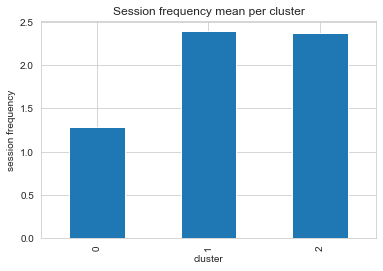

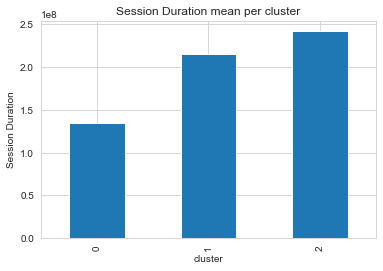

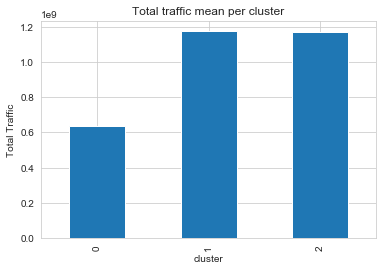

In [249]:
Agg_Bearer['Bearer Id','mean'].plot(kind='bar')
plt.ylabel('session frequency')
plt.title('Session frequency mean per cluster')
plt.show()

Agg_duration['Dur. (ms).1','mean'].plot(kind='bar')
plt.ylabel('Session Duration')
plt.title('Session Duration mean per cluster')
plt.show()

Agg_total_traffic['total DL_UL data','mean'].plot(kind='bar')
plt.ylabel('Total Traffic')
plt.title('Total traffic mean per cluster')
plt.show()

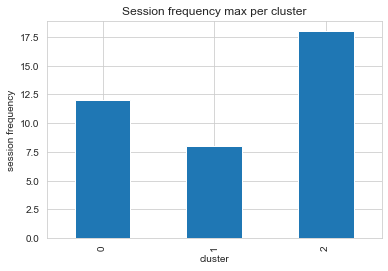

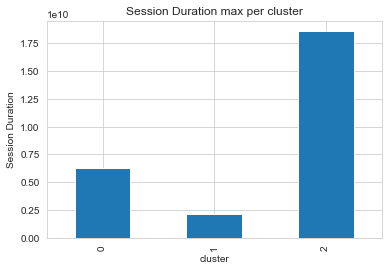

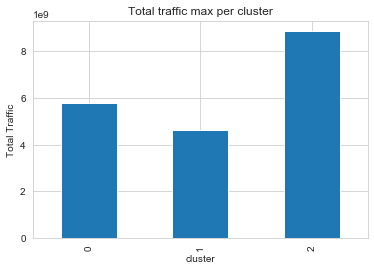

In [250]:
Agg_Bearer['Bearer Id','max'].plot(kind='bar')
plt.ylabel('session frequency')
plt.title('Session frequency max per cluster')
plt.show()

Agg_duration['Dur. (ms).1','max'].plot(kind='bar')
plt.ylabel('Session Duration')
plt.title('Session Duration max per cluster')
plt.show()

Agg_total_traffic['total DL_UL data','max'].plot(kind='bar')
plt.ylabel('Total Traffic')
plt.title('Total traffic max per cluster')
plt.show()

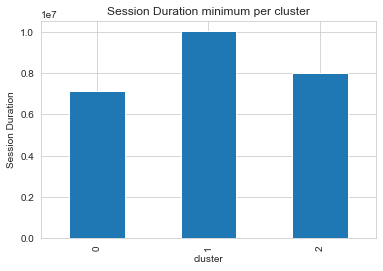

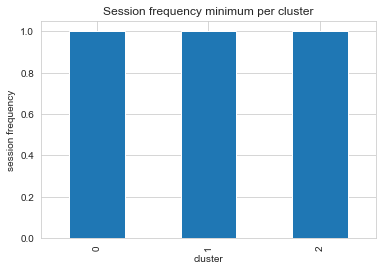

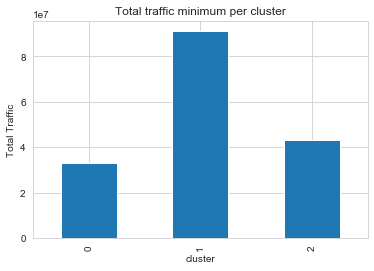

In [251]:
Agg_duration['Dur. (ms).1','min'].plot(kind='bar')
plt.ylabel('Session Duration')
plt.title('Session Duration minimum per cluster')
plt.show()

Agg_Bearer['Bearer Id','min'].plot(kind='bar')
plt.ylabel('session frequency')
plt.title('Session frequency minimum per cluster')
plt.show()

Agg_total_traffic['total DL_UL data','min'].plot(kind='bar')
plt.ylabel('Total Traffic')
plt.title('Total traffic minimum per cluster')
plt.show()

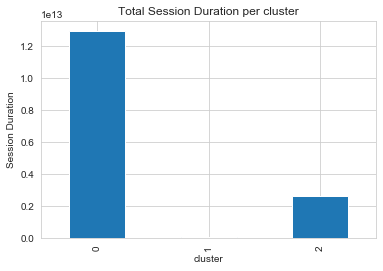

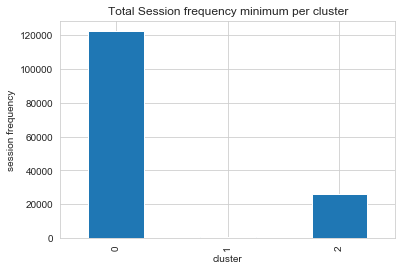

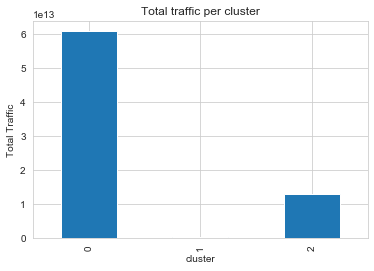

In [252]:
Agg_duration['Dur. (ms).1','sum'].plot(kind='bar')
plt.ylabel('Session Duration')
plt.title('Total Session Duration per cluster')
plt.show()

Agg_Bearer['Bearer Id','sum'].plot(kind='bar')
plt.ylabel('session frequency')
plt.title('Total Session frequency minimum per cluster')
plt.show()

Agg_total_traffic['total DL_UL data','sum'].plot(kind='bar')
plt.ylabel('Total Traffic')
plt.title('Total traffic per cluster')
plt.show()

In [171]:
#application dataframe 
df_app = df2.pivot_table(index='MSISDN/Number', values=['total_gaming','total_google','total_youtube','total_social','total_email','total_netflix'])
df_app.head()

,total_email,total_gaming,total_google,total_netflix,total_social,total_youtube
MSISDN/Number,,,,,,
3.360100e+10,1331362.0,812458661.0,4389005.0,27180981.0,2232135.0,21624548.0
3.360100e+10,3307781.0,119750078.0,5334863.0,11221763.0,2660565.0,12432223.0
3.360100e+10,3205380.0,538827713.0,3443126.0,19353900.0,3195623.0,21333570.0
3.360101e+10,2284670.0,391126127.0,9678493.0,1942092.0,280294.0,6977321.0
3.360101e+10,1652734.5,657398910.0,9249808.0,24600862.0,1456271.0,20766501.0


In [175]:
gaming = df2.groupby(['MSISDN/Number']).agg({'total_gaming':'sum'})
google = df2.groupby(['MSISDN/Number']).agg({'total_google':'sum'})
netflix = df2.groupby(['MSISDN/Number']).agg({'total_netflix':'sum'})
social = df2.groupby(['MSISDN/Number']).agg({'total_social':'sum'})
you_tube = df2.groupby(['MSISDN/Number']).agg({'total_youtube':'sum'})
email = df2.groupby(['MSISDN/Number']).agg({'total_email':'sum'})


#sorting
game_sort = gaming.sort_values('total_gaming', ascending=False).head(10)
google_sort=google.sort_values('total_google', ascending=False).head(10)
netflix_sort=netflix.sort_values('total_netflix', ascending=False).head(10)
social.sort_values('total_social', ascending=False).head(10)
you_tube.sort_values('total_youtube', ascending=False).head(10)
email.sort_values('total_email', ascending=False).head(10)

,total_email
MSISDN/Number,
3.362632e+10,42418782.0
3.361489e+10,40788634.0
3.362578e+10,40633966.0
3.378632e+10,36310123.0
3.365973e+10,35999792.0
3.376054e+10,33693767.0
3.367588e+10,31514421.0
3.366546e+10,30417885.0
3.366716e+10,30335796.0


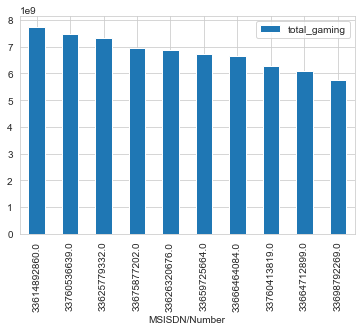

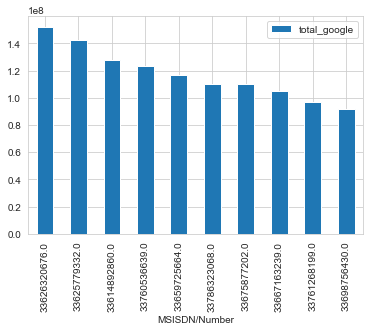

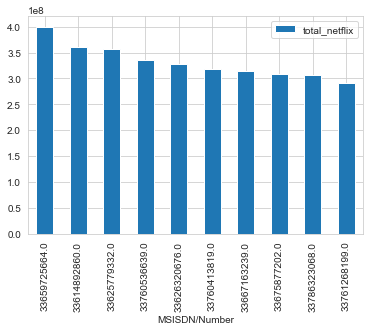

In [177]:
#plot top 3 most used application
game_sort.plot(kind='bar')
google_sort.plot(kind='bar')
netflix_sort.plot(kind='bar')
plt.show()

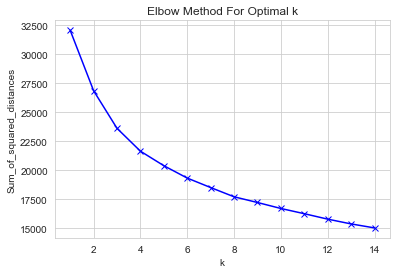

In [172]:
# Import required packages
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_app)
transformed_df = mms.transform(df_app)

#initialize kmeans and identify sum of squared distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformed_df)
    Sum_of_squared_distances.append(km.inertia_)
    
#using elboe method to determine appropriate k value
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

from the elbow diagram, appropriate k value to use is 4(k=4)
performing clustering on aggregated application data with k = 4

[[-0.85516355  1.02188522  0.00132504 -0.01724334  0.03638541 -0.05810683
  -1.12869085]
 [ 0.85120011  1.03109616  0.02489746  0.00280012  0.0270156   0.02093312
  -1.13120999]
 [ 0.02454175 -0.63153519  0.00699281  0.00688183  0.90343485 -0.00812973
   0.05843637]
 [-0.02079073 -0.59203228 -0.02215269  0.00180863 -0.91307661  0.02971982
   1.26903684]]


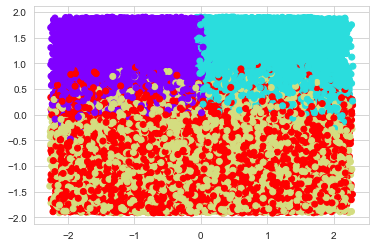

In [183]:
#normalize aggregated application data frame
from sklearn import preprocessing
#normalizd_app_df = preprocessing.normalize(df_app)
#print(normalizd_app_df)
normalizd_app_df=(df_app-df_app.mean())/df_app.std()
normalizd_app_df.head()

#performing Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Kmeans = KMeans(n_clusters=4).fit(normalizd_app_df)
centroids_app = Kmeans.cluster_centers_
print(centroids)
plt.scatter(normalizd_app_df.iloc[:,0],normalizd_app_df.iloc[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.show()


In [184]:
df_app['cluster'] = Kmeans.labels_
df_app.head()

,total_email,total_gaming,total_google,total_netflix,total_social,total_youtube,cluster
MSISDN/Number,,,,,,,
3.360100e+10,1331362.0,812458661.0,4389005.0,27180981.0,2232135.0,21624548.0,0
3.360100e+10,3307781.0,119750078.0,5334863.0,11221763.0,2660565.0,12432223.0,2
3.360100e+10,3205380.0,538827713.0,3443126.0,19353900.0,3195623.0,21333570.0,2
3.360101e+10,2284670.0,391126127.0,9678493.0,1942092.0,280294.0,6977321.0,3
3.360101e+10,1652734.5,657398910.0,9249808.0,24600862.0,1456271.0,20766501.0,0


Task 3.1

In [185]:
df2["Avg RTT DL (ms)"].fillna(df2["Avg RTT DL (ms)"].mean(), inplace=True)
df2['Avg RTT UL (ms)'].fillna(df2['Avg RTT UL (ms)'].mean(), inplace=True)
df2['Avg Bearer TP UL (kbps)'].fillna(df2['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df2['Avg Bearer TP DL (kbps)'].fillna(df2['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df2['TCP DL Retrans. Vol (Bytes)'].fillna(df2['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df2['TCP UL Retrans. Vol (Bytes)'].fillna(df2['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
df2['Handset Type'].fillna(df2['Handset Type'].mode(), inplace=True)

df2['total Avg RTT'] = df2["Avg RTT DL (ms)"] + df2['Avg RTT UL (ms)']
df2['total Avg Bearer TP'] = df2['Avg Bearer TP UL (kbps)'] + df2['Avg Bearer TP DL (kbps)']
df2['total TCP Retrans'] = df2['TCP DL Retrans. Vol (Bytes)'] + df2['TCP UL Retrans. Vol (Bytes)']

In [214]:
#Aggregating user by experience
df_experience=df2.pivot_table(index="MSISDN/Number", values=['total Avg Bearer TP','total Avg RTT','total TCP Retrans'], aggfunc='sum')
print(df_experience.head())

#Aggregating handset type
df_Handset = df2.groupby(['MSISDN/Number']).agg({'Handset Type':'sum'})
df_Handset.head()

               total Avg Bearer TP  total Avg RTT  total TCP Retrans
MSISDN/Number                                                       
3.360100e+10                  76.0      46.000000       2.165043e+07
3.360100e+10                  99.0      31.000000       2.165043e+07
3.360100e+10                  97.0     125.861976       2.165043e+07
3.360101e+10                 248.0      84.000000       7.673135e+05
3.360101e+10               56844.0     119.000000       3.102126e+07


,Handset Type
MSISDN/Number,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,Apple iPhone 7 (A1778)
3.360100e+10,undefined
3.360101e+10,Apple iPhone 5S (A1457)
3.360101e+10,Apple iPhone Se (A1723)Apple iPhone Se (A1723)


In [268]:
#top 10 TCP, RTT and Through put values
print(df_3[['total Avg Bearer TP']].sort_values('total Avg Bearer TP',ascending=False).head(10))
print(df_3[['total Avg RTT']].sort_values('total Avg RTT', ascending=False).head(10))
print(df_3[['total TCP Retrans']].sort_values('total TCP Retrans', ascending=False).head(10))

               total Avg Bearer TP
MSISDN/Number                     
3.376233e+10              902222.0
3.366871e+10              840424.0
3.365955e+10              798342.0
3.366995e+10              690815.0
3.366843e+10              676858.0
3.369817e+10              618797.0
3.362570e+10              564179.0
3.365808e+10              550352.0
3.376264e+10              549661.0
3.366566e+10              530353.0
               total Avg RTT
MSISDN/Number               
3.366232e+10         96924.0
3.366087e+10         64670.0
3.368369e+10         54848.0
3.369855e+10         46021.0
3.376181e+10         37084.0
3.366879e+10         36304.0
3.376094e+10         27278.0
3.360679e+10         26300.0
3.367182e+10         25715.0
3.378187e+10         25388.0
               total TCP Retrans
MSISDN/Number                   
3.366773e+10        8.354209e+09
3.365908e+10        7.941860e+09
3.366098e+10        7.374905e+09
3.376128e+10        6.043978e+09
3.376264e+10        5.879989e+09
3

In [272]:
#bottom TCP, RTT and Through put values
print(df_3[['total Avg Bearer TP']].sort_values('total Avg Bearer TP',ascending=True).head())
print(df_3[['total Avg RTT']].sort_values('total Avg RTT', ascending=True).head(10))
print(df_3[['total TCP Retrans']].sort_values('total TCP Retrans', ascending=True).head(10))

               total Avg Bearer TP
MSISDN/Number                     
3.377776e+10                   0.0
3.361064e+10                   0.0
3.365934e+10                   0.0
3.365947e+10                   0.0
3.369859e+10                   0.0
               total Avg RTT
MSISDN/Number               
3.366158e+10             0.0
3.365298e+10             0.0
3.366020e+10             2.0
3.369505e+10             4.0
3.365949e+10             5.0
3.366862e+10             6.0
3.364768e+10             8.0
3.367220e+10             9.0
3.361085e+10             9.0
3.363468e+10            10.0
               total TCP Retrans
MSISDN/Number                   
3.365013e+10                97.0
3.361478e+10               128.0
3.376206e+10               129.0
3.362636e+10               134.0
3.360783e+10               143.0
3.376964e+10               176.0
3.365068e+10               176.0
3.378420e+10               177.0
3.367937e+10               179.0
3.369969e+10               182.0


In [274]:
average_throughput_handset_type = df2.groupby(["Handset Type"]).agg({'total Avg Bearer TP':'sum'})
print(average_throughput_handset_type.sort_values('total Avg Bearer TP', ascending=False).head(10))

                              total Avg Bearer TP
Handset Type                                     
Huawei B528S-23A                      832626680.0
undefined                              89424670.0
Apple iPhone 7 (A1778)                 76769459.0
Apple iPhone 6S (A1688)                74118773.0
Apple iPhone 6 (A1586)                 68596814.0
Huawei E5180                           64208823.0
Apple iPhone Xr (A2105)                62367607.0
Samsung Galaxy S8 (Sm-G950F)           62194400.0
Apple iPhone 8 (A1905)                 57739501.0
Apple iPhone X (A1901)                 56920948.0


In [275]:
average_TCP_handset_type = df2.groupby(["Handset Type"]).agg({'total TCP Retrans':'sum'})
print(average_TCP_handset_type.sort_values('total TCP Retrans', ascending=False).head(10))

                              total TCP Retrans
Handset Type                                   
Huawei B528S-23A                   1.087268e+12
Apple iPhone 6S (A1688)            1.723309e+11
Apple iPhone 6 (A1586)             1.528386e+11
undefined                          1.467669e+11
Apple iPhone 7 (A1778)             1.054607e+11
Apple iPhone Se (A1723)            9.230349e+10
Apple iPhone 8 (A1905)             8.722872e+10
Apple iPhone Xr (A2105)            8.432280e+10
Samsung Galaxy S8 (Sm-G950F)       6.927824e+10
Huawei E5180                       6.764855e+10


[[-0.26804487 -0.03976553 -0.05857083]
 [ 3.03244178  0.28844719 19.06968629]
 [ 2.26018641  0.33865921  0.11171693]]


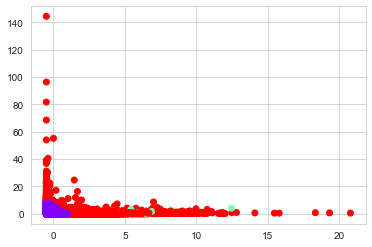

In [218]:
#normalize aggregated application data frame
from sklearn import preprocessing
#normalizd_app_df = preprocessing.normalize(df_app)
#print(normalizd_app_df)
normalizd_exp_df=(df_experience-df_experience.mean())/df_experience.std()
normalizd_exp_df.head()

#performing Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Kmeans = KMeans(n_clusters=3).fit(normalizd_exp_df)
centroids_exp = Kmeans.cluster_centers_
print(centroids_exp)
plt.scatter(normalizd_exp_df.iloc[:,0],normalizd_exp_df.iloc[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.show()


In [219]:
df_experience['cluster'] = Kmeans.labels_
df_experience.head()

,total Avg Bearer TP,total Avg RTT,total TCP Retrans,cluster
MSISDN/Number,,,,
3.360100e+10,76.0,46.000000,2.165043e+07,0
3.360100e+10,99.0,31.000000,2.165043e+07,0
3.360100e+10,97.0,125.861976,2.165043e+07,0
3.360101e+10,248.0,84.000000,7.673135e+05,0
3.360101e+10,56844.0,119.000000,3.102126e+07,0


### Task 4

Engagement Score

In [198]:
#to determine the less engaged cluster
df_engage.groupby(['cluster'], sort=False).agg({'cluster':'count'})

,cluster
cluster,
0,79850
1,23457
2,3549


In [208]:
#with cluster three being the least engaged cluster
cluster_mean_eng = centroids_eng[2]
cluster_mean_eng

array([3.74298436, 2.74823042, 3.26026791])

In [209]:
#to determine engagement score
df_engage['eng_point'] = (((df_engage["Bearer Id"] - cluster_mean_eng[0]) ** 2) + ((df_engage["Dur. (ms).1"] - cluster_mean_eng[1]) ** 2) + 
                                     ((df_engage["total DL_UL data"] - cluster_mean_eng[2]) ** 2)) ** .5

In [212]:
df_engage.head()

,Bearer Id,Dur. (ms).1,total DL_UL data,eng_point,cluster
MSISDN/Number,,,,,
3.360100e+10,1,116720140.0,8.786906e+08,8.864089e+08,1
3.360100e+10,1,181230963.0,1.568596e+08,2.396865e+08,1
3.360100e+10,1,134969374.0,5.959665e+08,6.110587e+08,1
3.360101e+10,1,49878024.0,4.223207e+08,4.252559e+08,1
3.360101e+10,2,37104453.0,1.457411e+09,1.457883e+09,0


Experience Score

In [220]:
#to determine the less engaged cluster
df_experience.groupby(['cluster'], sort=False).agg({'cluster':'count'})

,cluster
cluster,
0,95639
2,10988
1,229


In [221]:
#with cluster three being the least engaged cluster
cluster_mean_exp = centroids_exp[1]
cluster_mean_exp

array([ 3.03244178,  0.28844719, 19.06968629])

In [253]:
#to determine engagement score
df_experience['exp_point'] = (((df_experience["total Avg Bearer TP"] - cluster_mean_exp[0]) ** 2) + ((df_experience["total Avg RTT"] - cluster_mean_exp[1]) ** 2) + 
                                     ((df_experience["total TCP Retrans"] - cluster_mean_exp[2]) ** 2)) ** .5

In [254]:
df_experience.head()

,total Avg Bearer TP,total Avg RTT,total TCP Retrans,cluster,eng_point,exp_point
MSISDN/Number,,,,,,
3.360100e+10,76.0,46.000000,2.165043e+07,0,2.165041e+07,2.165041e+07
3.360100e+10,99.0,31.000000,2.165043e+07,0,2.165041e+07,2.165041e+07
3.360100e+10,97.0,125.861976,2.165043e+07,0,2.165041e+07,2.165041e+07
3.360101e+10,248.0,84.000000,7.673135e+05,0,7.672945e+05,7.672945e+05
3.360101e+10,56844.0,119.000000,3.102126e+07,0,3.102130e+07,3.102130e+07


Satisfaction Score

In [277]:
score = pd.concat([df_engage['eng_point'], df_experience['exp_point']], axis=1)

#satisfaction score
score['satisfaction_score'] = (score['eng_point']+score['exp_point'])/2
score.sort_values('satisfaction_score', ascending=False).head(10)

,eng_point,exp_point,satisfaction_score
MSISDN/Number,,,
3.362578e+10,2.040798e+10,2.631796e+08,1.033558e+10
3.361489e+10,1.332647e+10,1.349167e+08,6.730696e+09
3.376054e+10,1.259402e+10,2.510154e+08,6.422519e+09
3.362632e+10,1.186750e+10,2.377329e+08,6.052619e+09
3.366773e+10,2.247399e+09,8.354209e+09,5.300804e+09
3.366716e+10,1.039423e+10,3.271701e+07,5.213473e+09
3.365908e+10,1.673032e+09,7.941860e+09,4.807446e+09
3.366098e+10,2.212203e+09,7.374905e+09,4.793554e+09
3.367588e+10,9.270768e+09,1.678384e+08,4.719303e+09


In [262]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
into = score[["eng_point","exp_point"]]
out = score["satisfaction_score"]
regr.fit(into,out)
print ('The satisfaction score is: ', regr.predict([[5,5]]))


The satisfaction score is:  [5.00000298]
